# 📊 Trending YouTube Video Analysis with Sentiment Insights

## 🎯 Project Objective:
To analyze trending YouTube videos using the YouTube Data API, extract useful insights about engagement patterns, and identify trends based on views, likes, comments, tags, and publishing time

## 🗂 Dataset Source:
- Fetched using *YouTube Data API v3*
- Data includes video metadata like title, description, tags, category, views, likes, comments, publish time, etc.

## 🧹 Data Preparation:
- API Authentication and data extraction
- Converted JSON data into a structured Pandas DataFrame
- Handled missing values in tags and comments by filling with "No tags" and "0" respectively
- Converted time-related fields to datetime objects
- Added Category Name using YouTube Category API
- transformed some of the columns
- Added sentiment label columnn

## 📈 Exploratory Data Analysis (EDA):
- Most liked, commented, and viewed videos
- Publish time analysis (date and time trends)
- Category-wise video performance
- Pie and bar charts for visual representation
- Engagement ratio analysis
- Sentiment analysis

## 🧠 Key Insights:
- Most Viewed and Commented Video: "War 2 Official Trailer" stands out as the most viewed and most commented video in the dataset.
- Most Liked Video: "Karuppa Tamil Teaser" received the highest number of likes, crossing 600,000.
- Trending Date Concentration: A majority of the videos trended on 26th July 2025, indicating potential of engagement on weekends.
- Optimal Publishing Time: Most trending videos were published between 2 PM – 4 PM, with a secondary engagement peak between 6 PM – 7 PM.
- Top Trending Category: The Music category featured the highest number of trending videos.
- Most Viewed Categories: Film & Animation recorded the highest views, followed closely by the Gaming category.
- Highest Engagement Ratio: Videos under the Entertainment category had the highest engagement ratio, accounting for 27.9% of the total.
- Sentiment Distribution: Most trending videos had positive sentiment in their descriptions.
- Views by Sentiment: Videos with positive sentiment descriptions attracted 56.1% of total views, while negative sentiment videos followed with 31.3%.

## 🧰 Tools & Libraries:
- Python, Pandas, Matplotlib, Seaborn, os, requests, time, textblob
- YouTube Data API v3
- Datetime, Regex, JSON

## 📦 Deliverables:
- Cleaned dataset (CSV)
- EDA notebook with insights and visuals
- Final visuals like bar charts, pie charts, line graphs

In [305]:
#importing necessary lib and modules
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import re
import requests 
!pip install schedule
import schedule
import time
!pip install --upgrade google-api-python-client
from googleapiclient.discovery import build
import json
!pip install textblob
from textblob import TextBlob as bb
print('All lib and modules installed')

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/624.3 kB 131.3 kB/s eta 0:00:05
   - ------------------------------------- 30.7/624.3 kB 163.8 kB/s eta 0:00:04
   -- ------------------------------------ 41.0/624.3 kB 196.9 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/624.3 kB 233.8 kB/s eta 0:00:03
   ----- --------------------------------- 92.2/624.3 kB 308.0 kB/s eta 0:00:02
   --------------- ---------------------- 256.0/624.3 kB 787.7 kB/s eta 0:00:01
   ---------------------------------------  614.4/624.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---

In [306]:
#loading api_key
load_dotenv()
api_key=os.getenv("YOUTUBE_API_KEY")
#initializing youtube api client
youtube=build('youtube','v3',developerKey=api_key)
#calling list of trending videos
request=youtube.videos().list(
    part='snippet,statistics,contentDetails',
    chart='mostPopular',
    regionCode='IN',
    maxResults=50)
response=request.execute()
#Extracting relevant details from the list of videos
video_data=[]
for video in response['items']:
    snippet=video['snippet']
    stats=video['statistics']
    video_data.append({
        'video_id':video['id'],
        'Title':snippet.get('title'),
        'Channel_title':snippet.get('channelTitle'),
        'Published_date':snippet.get('publishedAt'),
        'Category_id':snippet.get('categoryId',None),
        'Views':stats.get('viewCount'),
        'Likes':stats.get('likeCount'),
        'Comments':stats.get('commentCount'),
        'Description':snippet.get('description'),
        'Tags':snippet.get('tags')})
#converting to dataframe
df=pd.DataFrame(video_data)
df.head()
    

,video_id,Title,Channel_title,Published_date,Category_id,Views,Likes,Comments,Description,Tags
0,sUuLY8-LjKM,"Vibe Undi - Lyrical | Mirai | Teja Sajja, Riti...",Tips Telugu,2025-07-26T04:39:00Z,10,3525583,94166,1002,It’s time to dance with Vibe Undi from Mirai! ...,"[Vibe Undi, Vibe Undi lyrical, Vibe Undi song,..."
1,xqdXSA8hNI4,"KINGDOM Official Trailer | Vijay Deverakonda, ...",Sithara Entertainments,2025-07-26T17:10:08Z,24,5375210,257617,7936,#KINGDOM ~ Starring Vijay Deverakonda in Lead ...,"[Kingdom, Vijay Deverakonda, Anirudh Ravichand..."
2,nLxlkFex1NU,[HINDI] iQOO Battleground Series 2025 | Semi F...,iQOO ESPORTS,2025-07-27T09:55:38Z,20,1500367,41878,273,The race to LAN is reaching its breaking point...,None
3,kt9IiIWRVnU,PAYAL 8K Full Song: Yo Yo Honey Singh | Nora F...,T-Series,2025-07-26T10:00:36Z,10,1040796,36230,1683,Presenting the 8K Full Video Song 'Payal' from...,"[hindi songs 2025, hindi songs new, bollywood ..."
4,mjBym9uKth4,WAR 2 | Official Trailer | Hrithik Roshan | NT...,YRF,2025-07-25T04:38:03Z,1,30622438,563471,33505,"Get ready for the storm, the WAR begins now! #...","[war 2 trailer, war 2 official trailer, war 2 ..."


In [307]:
#Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        50 non-null     object
 1   Title           50 non-null     object
 2   Channel_title   50 non-null     object
 3   Published_date  50 non-null     object
 4   Category_id     50 non-null     object
 5   Views           50 non-null     object
 6   Likes           50 non-null     object
 7   Comments        50 non-null     object
 8   Description     50 non-null     object
 9   Tags            39 non-null     object
dtypes: object(10)
memory usage: 4.0+ KB


In [308]:
#Changing datatypes
df.Views=pd.to_numeric(df['Views'],errors='coerce')
df.Comments=pd.to_numeric(df['Comments'],errors='coerce')
df.Likes=pd.to_numeric(df['Likes'],errors='coerce')
df.Published_date=pd.to_datetime(df['Published_date'],errors='coerce')
df.Title=df['Title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9/.-_| ]+','',x))
df.Category_id=df['Category_id'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   video_id        50 non-null     object             
 1   Title           50 non-null     object             
 2   Channel_title   50 non-null     object             
 3   Published_date  50 non-null     datetime64[ns, UTC]
 4   Category_id     50 non-null     int64              
 5   Views           50 non-null     int64              
 6   Likes           50 non-null     int64              
 7   Comments        50 non-null     int64              
 8   Description     50 non-null     object             
 9   Tags            39 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 4.0+ KB


In [309]:
#Checking for nulls
df.isnull().sum()

video_id           0
Title              0
Channel_title      0
Published_date     0
Category_id        0
Views              0
Likes              0
Comments           0
Description        0
Tags              11
dtype: int64

In [310]:
#Handling missing values
df.Comments=df['Comments'].fillna(0)
df.Tags=df['Tags'].fillna('No tags')

In [311]:
#Validating for any null values
df.isnull().sum()

video_id          0
Title             0
Channel_title     0
Published_date    0
Category_id       0
Views             0
Likes             0
Comments          0
Description       0
Tags              0
dtype: int64

In [312]:
#mapping category names by category id
category_map = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}
df['category_name']=df['Category_id'].map(category_map)


In [329]:
#Transformations
df['Published_day']=df['Published_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df['Published_time']=df['Published_date'].apply(lambda x: x.strftime('%H'))
df['like_view_ratio']=(df['Likes']/df['Views'])*100
df['desc_sentiment']=df['Description'].apply(lambda x: bb(str(x)).sentiment.polarity)
def get_sentiment_cat(score):
    if score>0:
        return 'Positive'
    elif score<0:
        return 'Negative'
    else:
        return 'Neutral'
df['desc_sentiment_label']=df['desc_sentiment'].apply(get_sentiment_cat)
df.head()

,video_id,Title,Channel_title,Published_date,Category_id,Views,Likes,Comments,Description,Tags,category_name,Published_day,Published_time,like_view_ratio,Desc_sentiment,desc_sentiment,desc_sentiment_label
0,sUuLY8-LjKM,Vibe Undi Lyrical | Mirai | Teja Sajja Ritika...,Tips Telugu,2025-07-26 04:39:00+00:00,10,3525583,94166,1002,It’s time to dance with Vibe Undi from Mirai! ...,"[Vibe Undi, Vibe Undi lyrical, Vibe Undi song,...",Music,2025-07-26,04,2.670934,0.202841,0.202841,Positive
1,xqdXSA8hNI4,KINGDOM Official Trailer | Vijay Deverakonda S...,Sithara Entertainments,2025-07-26 17:10:08+00:00,24,5375210,257617,7936,#KINGDOM ~ Starring Vijay Deverakonda in Lead ...,"[Kingdom, Vijay Deverakonda, Anirudh Ravichand...",Entertainment,2025-07-26,17,4.792687,0.233333,0.233333,Positive
2,nLxlkFex1NU,[HINDI] iQOO Battleground Series 2025 | Semi F...,iQOO ESPORTS,2025-07-27 09:55:38+00:00,20,1500367,41878,273,The race to LAN is reaching its breaking point...,No tags,Gaming,2025-07-27,09,2.791184,-0.042262,-0.042262,Negative
3,kt9IiIWRVnU,PAYAL 8K Full Song: Yo Yo Honey Singh | Nora F...,T-Series,2025-07-26 10:00:36+00:00,10,1040796,36230,1683,Presenting the 8K Full Video Song 'Payal' from...,"[hindi songs 2025, hindi songs new, bollywood ...",Music,2025-07-26,10,3.480990,0.341667,0.341667,Positive
4,mjBym9uKth4,WAR 2 | Official Trailer | Hrithik Roshan | NT...,YRF,2025-07-25 04:38:03+00:00,1,30622438,563471,33505,"Get ready for the storm, the WAR begins now! #...","[war 2 trailer, war 2 official trailer, war 2 ...",Film & Animation,2025-07-25,04,1.840059,0.230244,0.230244,Positive


In [330]:
#Saving file as csv
df.to_csv('data/cleaned_youtube_trending.csv',index=False)
print('CSV file saved succesfully')

CSV file saved succesfully


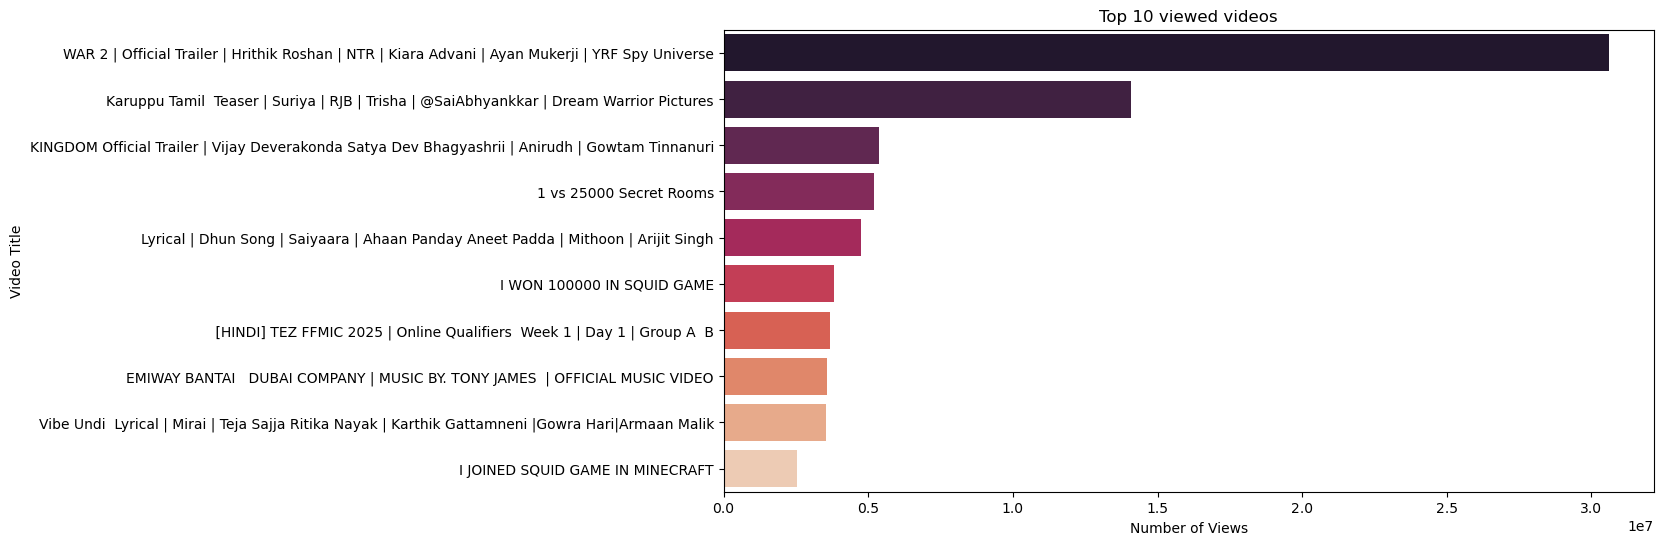

In [372]:
#top 10 viewed videos
top_videos_by_view=df.sort_values(by='Views',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Views',y='Title',data=top_videos_by_view,hue='Title',palette='rocket')
plt.title('Top 10 viewed videos')
plt.xlabel('Number of Views')
plt.ylabel('Video Title')
plt.savefig('visuals/Top 10 viewed videos.png',bbox_inches='tight')
plt.show() 

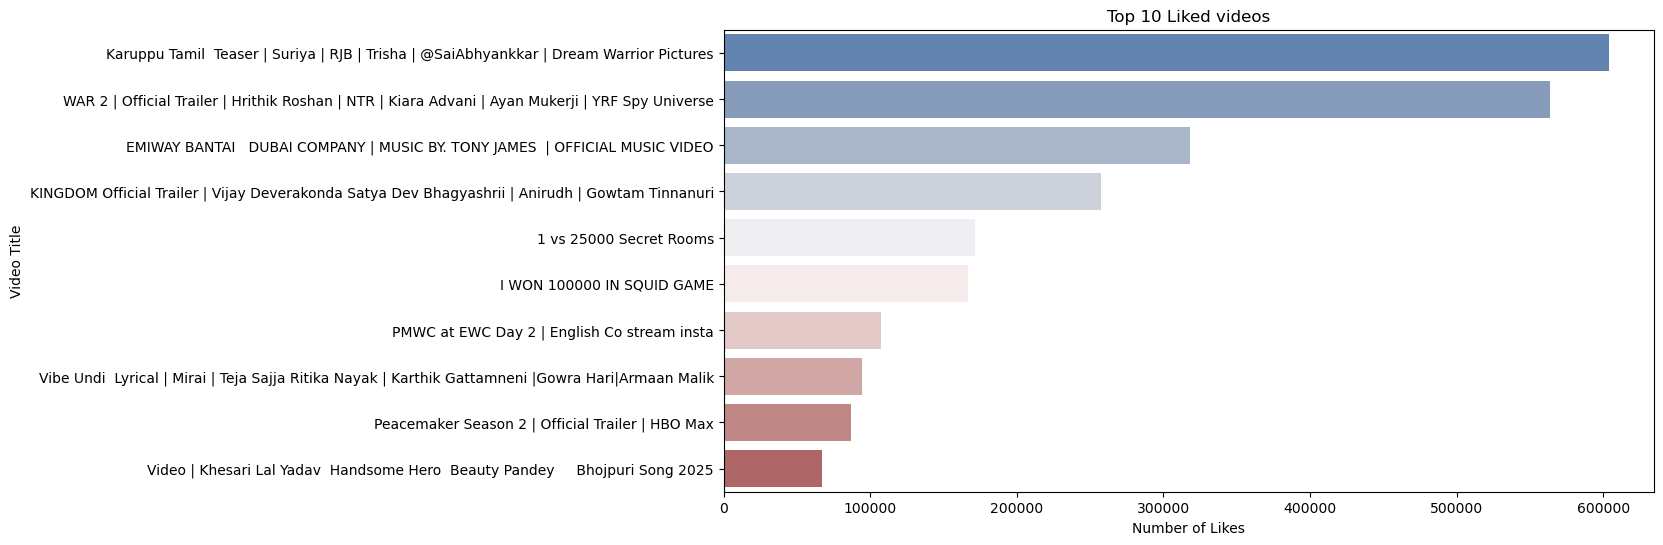

In [373]:
#top 10 liked videos
top_videos_by_likes=df.sort_values(by='Likes',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Likes',y='Title',data=top_videos_by_likes,hue='Title',palette='vlag')
plt.title('Top 10 Liked videos')
plt.xlabel('Number of Likes')
plt.ylabel('Video Title')
plt.savefig('visuals/Top 10 Liked videos.png',bbox_inches='tight')
plt.show() 

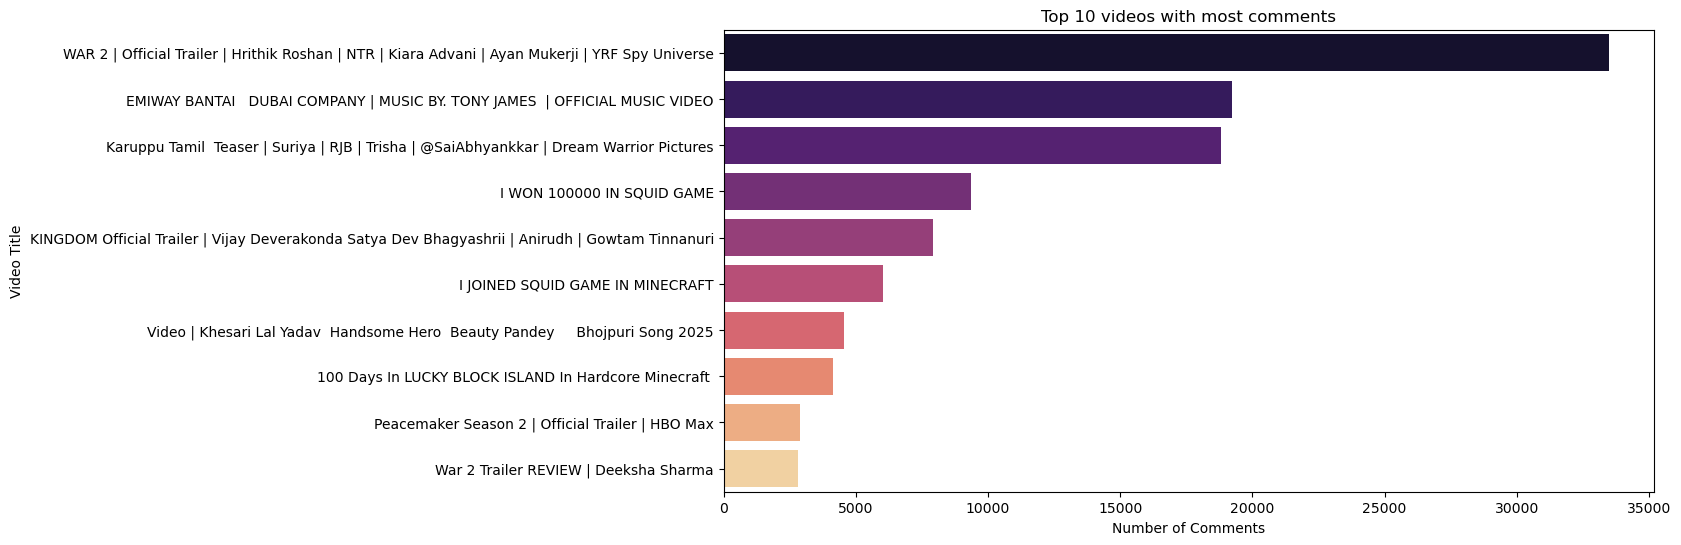

In [374]:
#top 10 videos with most comments
top_videos_by_comments=df.sort_values(by='Comments',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Comments',y='Title',data=top_videos_by_comments,hue='Title',palette='magma')
plt.title('Top 10 videos with most comments')
plt.xlabel('Number of Comments')
plt.ylabel('Video Title')
plt.savefig('visuals/Top 10 commented videos.png',bbox_inches='tight')
plt.show() 

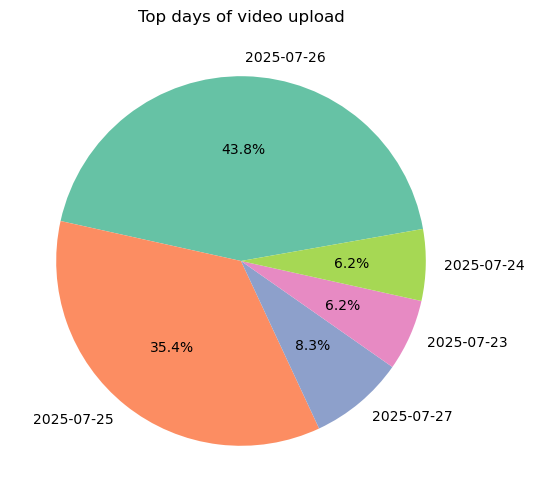

In [375]:
#Videos by publish date
videos_by_date=(df.groupby('Published_day').Published_day.count()).sort_values(ascending=False).head(5)
plt.figure(figsize=(6,6))
videos_by_date.plot.pie(autopct='%1.1f%%',startangle=10,colors=sns.color_palette('Set2'),ylabel='')
plt.title('Top days of video upload')
plt.savefig('visuals/Top days of video upload.png',bbox_inches='tight')
plt.show() 

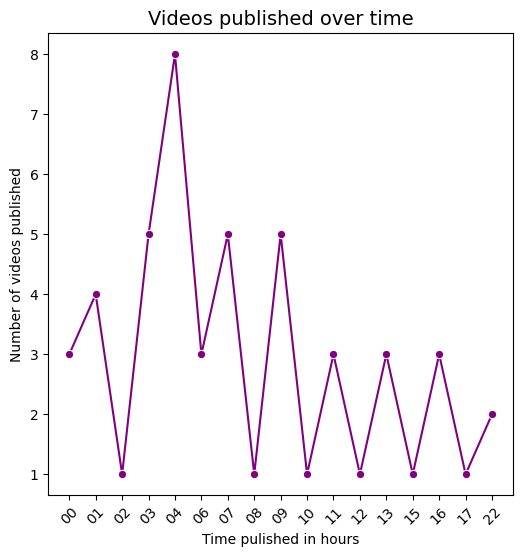

In [376]:
#Videos by publish time
videos_by_time=df.groupby('Published_time').size().sort_index()
plt.figure(figsize=(6,6))
sns.lineplot(x=videos_by_time.index,y=videos_by_time.values,marker='o',color='Purple')
plt.title('Videos published over time',fontsize=14)
plt.xlabel('Time pulished in hours')
plt.ylabel('Number of videos published')
plt.xticks(rotation=45)
plt.savefig('visuals/videos published over time.png',bbox_inches='tight')
plt.show()

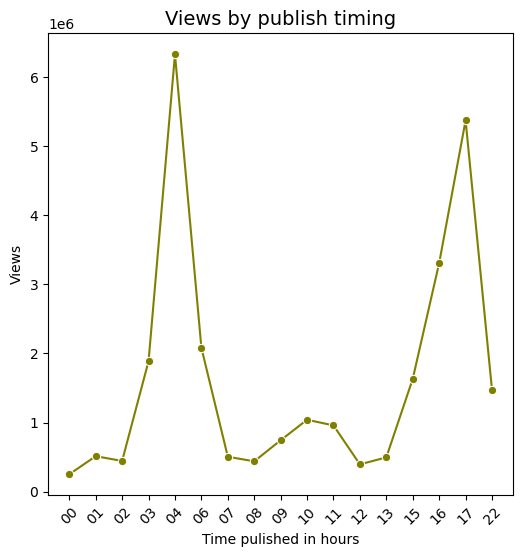

In [377]:
#Effect of time on views
videos_by_time=df.groupby('Published_time').Views.mean().sort_index()
plt.figure(figsize=(6,6))
sns.lineplot(x=videos_by_time.index,y=videos_by_time.values,marker='o',color='Olive')
plt.title('Views by publish timing',fontsize=14)
plt.xlabel('Time pulished in hours')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.savefig('visuals/Views by publish time.png',bbox_inches='tight')
plt.show()

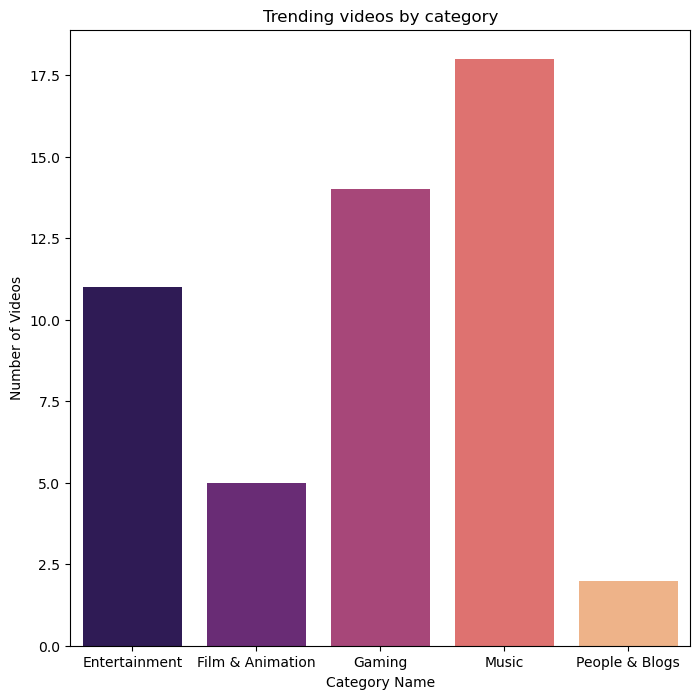

In [378]:
#distribution of videos by category_id
video_categ=df.groupby('category_name').size().sort_index()
plt.figure(figsize=(8,8))
sns.barplot(x=video_categ.index,y=video_categ.values,hue=video_categ.index,palette='magma')
plt.title('Trending videos by category')
plt.xlabel('Category Name')
plt.ylabel('Number of Videos')
plt.savefig('visuals/Trending videos by category.png',bbox_inches='tight')
plt.show() 

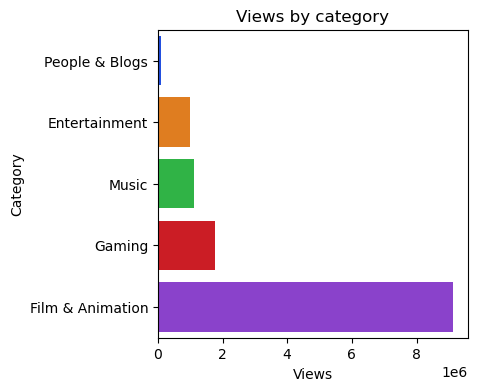

In [379]:
#category with most views
categ_view=df.groupby('category_name').Views.mean().sort_values()
plt.figure(figsize=(4,4))
sns.barplot(x=categ_view.values,y=categ_view.index,hue=categ_view.index,palette='bright')
plt.title('Views by category')
plt.xlabel('Views')
plt.ylabel('Category')
plt.savefig('visuals/Views by different category.png',bbox_inches='tight')
plt.show() 

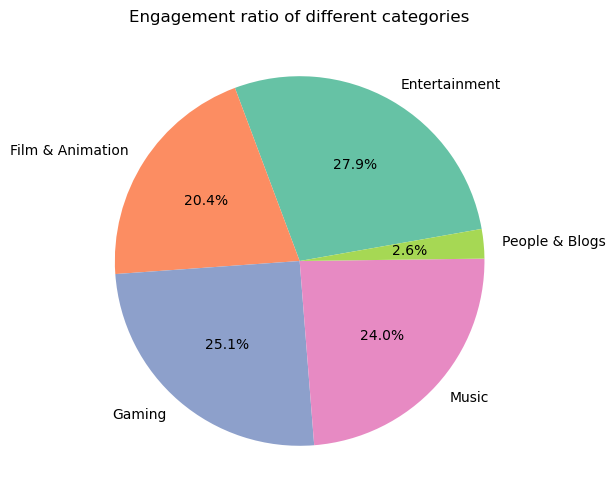

In [380]:
#Engagement ratio of diff categories
engage_rat=(df.groupby('category_name').like_view_ratio.mean()).sort_index()
plt.figure(figsize=(6,6))
engage_rat.plot.pie(autopct='%1.1f%%',startangle=10,colors=sns.color_palette('Set2'),ylabel='')
plt.title('Engagement ratio of different categories')
plt.savefig('visuals/Engagement ration of different categories.png',bbox_inches='tight')
plt.show() 

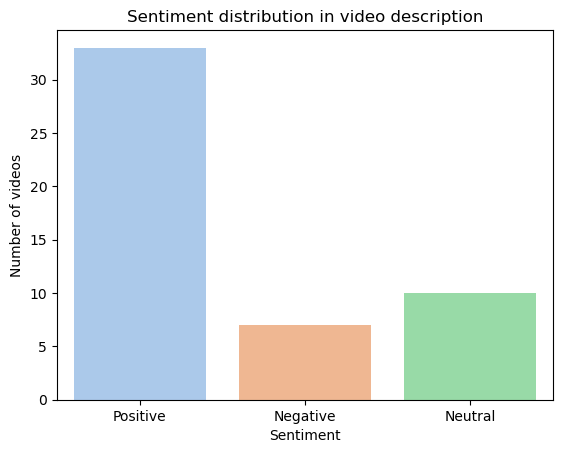

In [381]:
#sentiment analysis
sns.countplot(data=df,x='desc_sentiment_label',hue='desc_sentiment_label',palette='pastel')
plt.title('Sentiment distribution in video description')
plt.xlabel('Sentiment')
plt.ylabel('Number of videos')
plt.savefig('visuals/Sentiment analysis of videos.png',bbox_inches='tight')
plt.show()

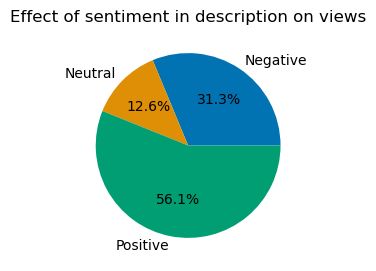

In [382]:
#Effect of desc sentiment on views
sent_effect_on_views=df.groupby('desc_sentiment_label').Views.mean().sort_index()
plt.figure(figsize=(3,3))
sent_effect_on_views.plot.pie(autopct='%1.1f%%',colors=sns.color_palette('colorblind'),ylabel='')
plt.title('Effect of sentiment in description on views')
plt.savefig('visuals/Effect of sentiments on views.png',bbox_inches='tight')
plt.show()

📌 Key Insights from YouTube Trending Videos Analysis

- "War 2 Official Trailer" emerged as the most viewed and most commented video.
- "Karuppa Tamil Teaser" received the highest likes (~600K), showing strong audience appreciation.
- Most trending videos were published on 26th July 2025, suggesting a potential engagement on weekends.
- 2 PM to 4 PM and 6 PM to 7 PM were the peak hours for video publication among trending content.
- The Music category dominated in terms of the number of trending videos.
- Film & Animation had the highest overall views, followed by Gaming.
- Entertainment videos had the highest engagement ratio at 27.9%, indicating strong viewer interaction.
- Descriptions with positive sentiment were most common and captured 56.1% of total views.
- Even negative sentiment videos gained considerable traction, accounting for 31.3% of views.